In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib.ticker as ticker
from scipy.integrate import simps

from sklearn.linear_model import LinearRegression

In [152]:
BASE_PATH = '../tp5/out/flux/'

In [153]:
def get_simulation_data(df):
    time_flux = df.groupby('time').agg({'ball_id':'count'}); 
    return {
        'time_flux': time_flux
    }

In [154]:
def plot_flux(tiempo, flujo):
    fig, ax = plt.subplots()
    ax.plot(tiempo, flujo, marker='x')
    plt.xlabel('Tiempo')
    plt.ylabel('Flujo')
    plt.grid(True)
    plt.show()
    
    return ax

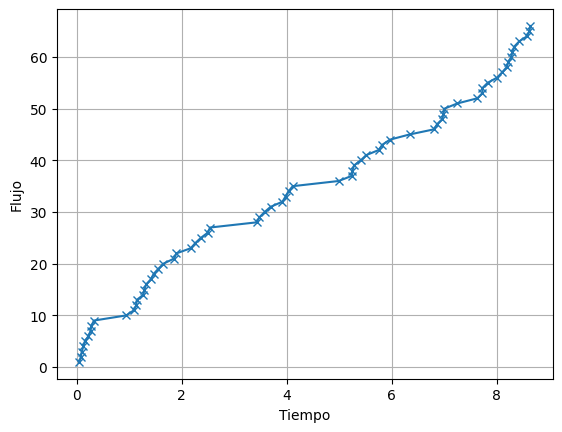

In [155]:
    path = f"{BASE_PATH}/silo_fq50_gap0.03_i0.csv"
    df = pd.read_csv(path)
    df = get_simulation_data(df)
    df = df['time_flux']
    ax = plot_flux(df.index, df.cumsum()['ball_id'])

[[6.41178075]]


<Axes: xlabel='x'>

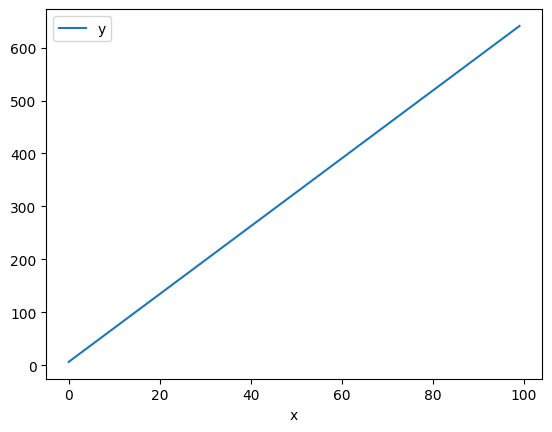

In [172]:
regression = LinearRegression()
regression.fit(np.array(df.reset_index()['time']).reshape(-1, 1), np.array(df.cumsum()['ball_id']).reshape(-1, 1))
regression.intercept_

x = np.arange(0, 100, 1)
y = x * regression.coef_ + regression.intercept_

print(regression.coef_)

reg = pd.DataFrame({'x': x, 'y': y.ravel()})
reg.set_index('x', inplace=True)
reg.plot()

6.411780745948597
6.125757009271954
[6.12575701]


<Axes: xlabel='x'>

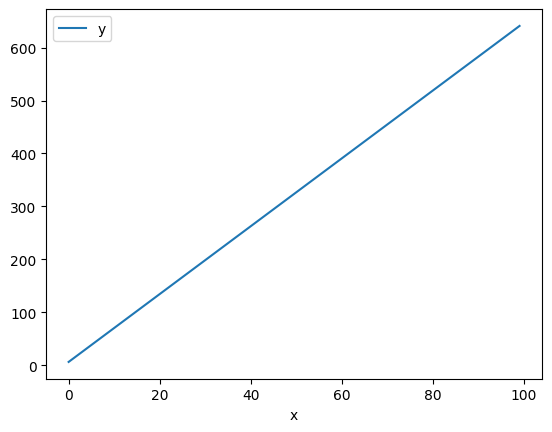

In [171]:
x = np.array(df.reset_index()['time'])
y = np.array(df.cumsum()['ball_id'])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

print(m)
print(c)

x = np.arange(0, 100, 1)
y = x * m + c

print(regression.intercept_)

reg = pd.DataFrame({'x': x, 'y': y.ravel()})
reg.set_index('x', inplace=True)
reg.plot()

In [157]:
df

,ball_id
time,
0.0503,1
0.0763,1
0.0947,1
0.1249,1
0.1544,1
...,...
8.3363,1
8.4299,1
8.5797,1


time         4.000000
particles    7.333333
dtype: float64

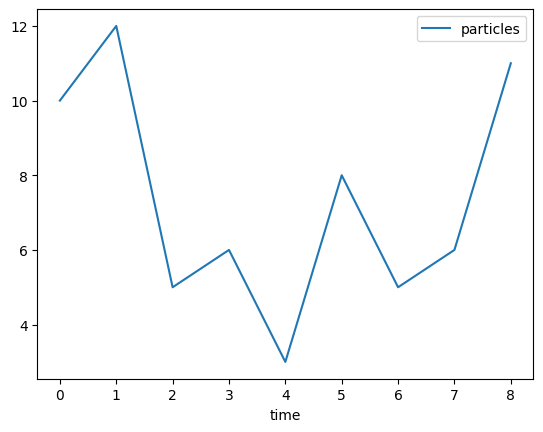

In [161]:
time_delta = 1
time_bins = np.arange(0, 10, time_delta)

data = []
df_without_index = df.reset_index()
for i in range(0, len(time_bins) - 1):
    lower = time_bins[i]
    upper = time_bins[i + 1]

    particles = df_without_index[(df_without_index['time'] < upper) & (df_without_index['time'] >= lower)]['ball_id'].sum()
    data.append({'time': lower, 'particles': particles})

q_df = pd.DataFrame(data)
q_df.plot(x='time', y='particles')

q_df.mean()

<Axes: xlabel='Timestamp'>

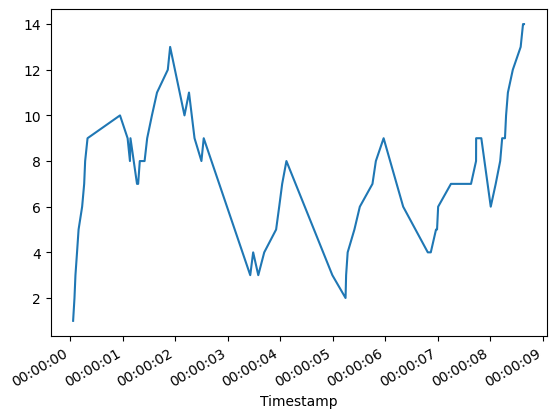

In [164]:
rolling_df = df.copy().reset_index()
rolling_df['Timestamp'] = pd.to_datetime(rolling_df['time'], unit='s')
rolling_df.set_index('Timestamp', inplace=True)
rolling_df.rolling(window='1000ms')['ball_id'].sum().plot()